In [1]:
import numpy as np
import scipy.stats as st
import numpy.random as npr
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import array
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Eval/Eval_3/test.csv')
df

,Unnamed: 0,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,0,120,284,27,62,100,False
1,1,113,282,33,64,135,False
2,2,128,279,28,64,115,True
3,3,108,282,23,67,125,True
4,4,136,286,25,62,93,False
...,...,...,...,...,...,...,...
1169,1169,113,275,27,60,100,False
1170,1170,128,265,24,67,120,False
1171,1171,130,291,30,65,150,True
1172,1172,125,281,21,65,110,False


In [7]:
smoking = df[['Maternal Smoker', 'Maternal Age']]
smoking

,Maternal Smoker,Maternal Age
0,False,27
1,False,33
2,True,28
3,True,23
4,False,25
...,...,...
1169,False,27
1170,False,24
1171,True,30
1172,False,21


In [8]:
smoker = smoking['Maternal Age'] [smoking['Maternal Smoker'] == True]
smoker

2       28
3       23
8       30
10      32
11      23
        ..
1162    28
1163    29
1164    21
1165    30
1171    30
Name: Maternal Age, Length: 459, dtype: int64

In [9]:
non_smoker = smoking['Maternal Age'] [smoking['Maternal Smoker'] == False]
non_smoker

0       27
1       33
4       25
5       33
6       23
        ..
1168    27
1169    27
1170    24
1172    21
1173    38
Name: Maternal Age, Length: 715, dtype: int64

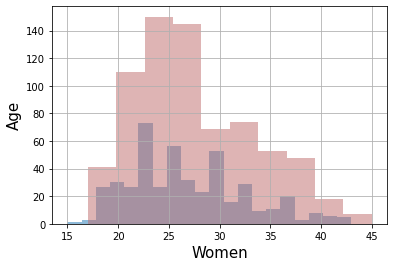

In [10]:
import seaborn as sns
smoker.hist(histtype='stepfilled', alpha=.5, bins=20)
non_smoker.hist(histtype='stepfilled', alpha=.5, color=sns.desaturate("indianred", .75), bins=10)
plt.xlabel('Women',fontsize=15)
plt.ylabel('Age',fontsize=15)
plt.show()

1. Draw the histograms of the two distributions in the sample(2), and state your
inferences(1).
2. Which statistical test would you employ?(2)
3. State the Null and Alternative Hypothesis (1).
4. What statistic do you recommend to apply for this case(2)?
5. State the observed statistic(2)
6. Simulate the test statistic under the Null that will help make the decision(3).
7. Draw a histogram to depict what the model of random selection predicts about the
statistic.(3)
8. Evaluate the empirical p-value of the test(3).
9. What is the outcome of your analysis? (1)
-------------------------------------------------------------------

In [11]:
# 1.The distribution of the ages of mother who smoked appears to be nearly similar but slightly shifted t when to non-smoking mothers.

In [12]:
# 2. We could use A/B testing in this type of problems

In [13]:
# 3.
# Null hypothesis: Maternal age is the same for mothers who don't smoke as for mothers who do.
# Alternative hypothesis: Mothers who smoke have a lower age, on average, than non-smoking mothers.

In [14]:
# 4. Test statistic - We will do the subtraction in the order "average age of the smoking group - average age of the non-smoking group". Smaller values of this statistic will favor the alternative hypothesis


In [15]:
means_table = smoking.groupby('Maternal Smoker').mean()
means_table

,Maternal Age
Maternal Smoker,
False,27.544056
True,26.736383


In [16]:
# 5. observed statistic
difference = means_table['Maternal Age'][1] - means_table['Maternal Age'][0]
difference

-0.8076725017901509

In [17]:
# 6.Simulate the test statistic under the Null that will help make the decision.
# The below will simulate you 10000 random samples with shuffled maternal ages.
import numpy as np
import array
diffs = np.zeros(10000)
for i in np.arange(10000):
    smoking = df[['Maternal Smoker', 'Maternal Age']]
    shuffled = smoking.sample(1174,replace = False)
    shuffled_ages = shuffled['Maternal Age']
    original_and_shuffled = smoking.assign(shuffled_weights=shuffled_ages.values )
    all_group_means= original_and_shuffled.groupby('Maternal Smoker').mean()
    difference = all_group_means['shuffled_weights'][0]- all_group_means['shuffled_weights'][1]
    diffs[i] = difference
diffs

array([ 0.08506787, -0.0687539 , -0.39070646, ..., -0.40501546,
        0.16019014, -0.57672349])

In [18]:
diffs_df = pd.DataFrame(diffs)
diffs_df

,0
0,0.085068
1,-0.068754
2,-0.390706
3,-0.226153
4,0.585883
...,...
9995,-0.941603
9996,0.042141
9997,-0.405015
9998,0.160190


Observed Difference: -0.576723494370551


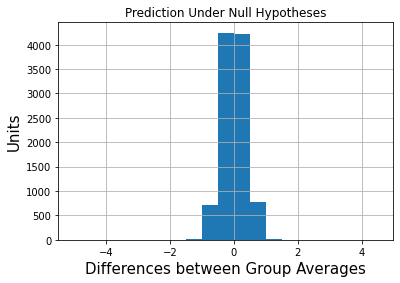

In [19]:
# 7.random selection predicts about the statistic.
diffs_df.hist(bins = np.arange(-5,5,0.5))
plt.title('Prediction Under Null Hypotheses');
plt.xlabel('Differences between Group Averages',fontsize=15)
plt.ylabel('Units',fontsize=15);
print('Observed Difference:', difference)

In [20]:
# 8. the p-value can be found from the below.
np.count_nonzero(diffs <= difference)/diffs.size

0.0463

In [22]:
# 9. Since the p-value of the given sample is less than 0.05 the null hypothesis is rejected.